In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from zlib import crc32
from sklearn import model_selection
from pandas.plotting import scatter_matrix

In [2]:
df_housing = pd.read_csv('../datasets/housing/housing.csv', encoding='utf8', sep=',')
print(df_housing.shape)
df_housing[:3]

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [3]:
print(df_housing.info())
print()
df_housing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
df_housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

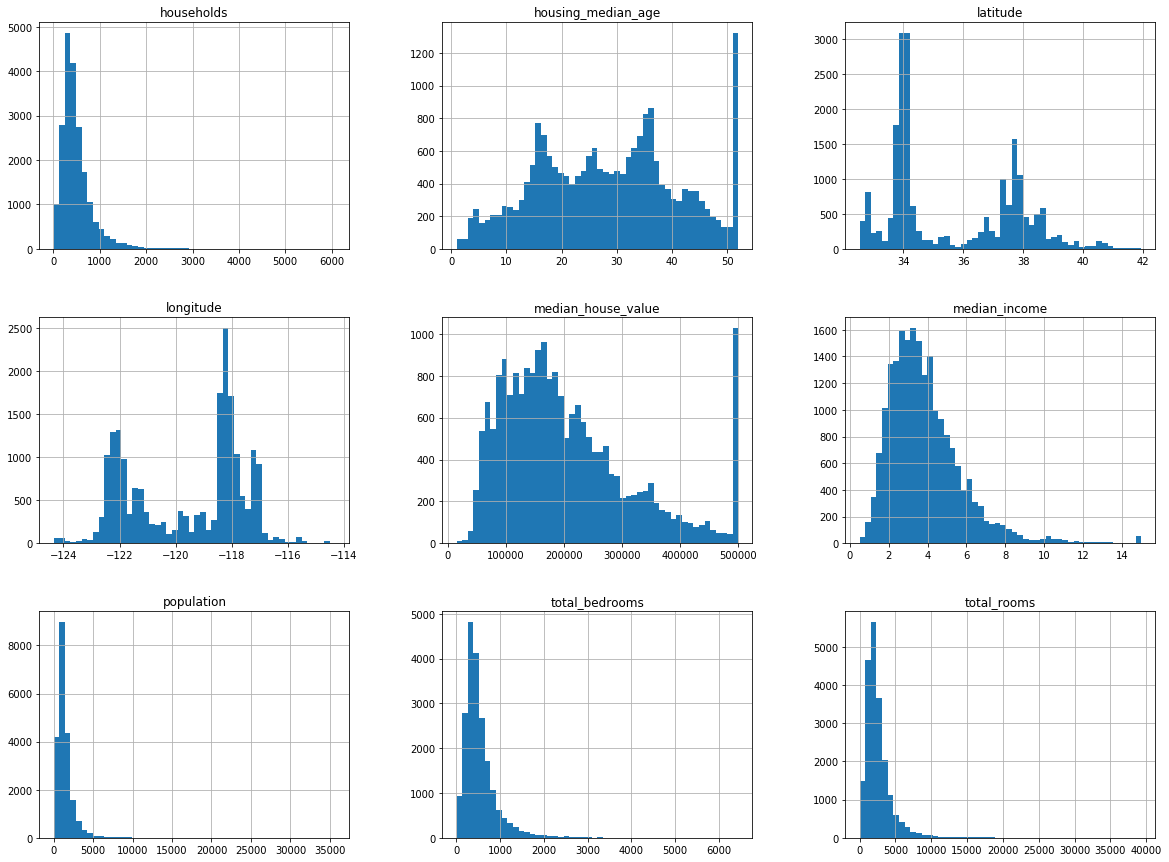

In [5]:
df_housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [6]:
# def test_set_check(identifier, test_ratio):
#     # why? 
#     return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

# def split_train_test_by_id(data, test_ratio, id_column):
#     in_test_set = data[id_column].apply(lambda _id: test_set_check(_id, test_ratio))
#     return data.loc[~in_test_set], data.loc[in_test_set]

# df_train, df_test = split_train_test_by_id(df_housing.reset_index(), 0.2,  "index")

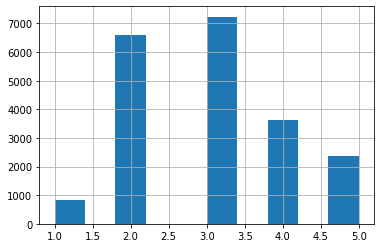

In [7]:
df_housing['income_cat'] = pd.cut(df_housing['median_income'], bins=[0.0, 1.5, 3.0, 4.5, 6, np.inf], labels=[1, 2, 3, 4, 5])
df_housing['income_cat'].hist()
plt.show()

In [8]:
split = model_selection.StratifiedShuffleSplit(
    n_splits=1, test_size=0.2, random_state=42
)
for train_idx, test_idx in split.split(df_housing, df_housing['income_cat']):
    strat_train_set = df_housing.loc[train_idx]
    strat_test_set = df_housing.loc[test_idx]
print(strat_train_set.shape, strat_test_set.shape)

(16512, 11) (4128, 11)


In [9]:
print(strat_test_set['income_cat'].value_counts() / len (strat_test_set))
print(df_housing['income_cat'].value_counts() / len (df_housing))

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64


In [10]:
df_housing= strat_train_set

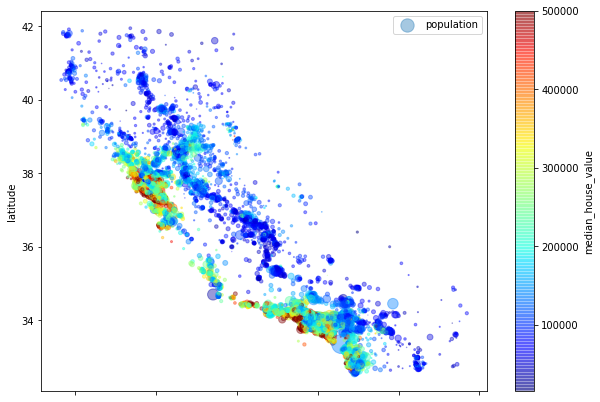

In [12]:
df_housing.plot(
    kind="scatter", 
    x = "longitude", 
    y = "latitude", 
    alpha = 0.4,  # ???
    s = df_housing['population'] / 100,  # radius of circle
    label = "population",  
    figsize = (10, 7), 
    c = "median_house_value",  # color
    cmap = plt.get_cmap("jet"), 
    colorbar = True
)
plt.legend()
plt.show()

In [13]:
corr_matrix = df_housing.corr()

In [15]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

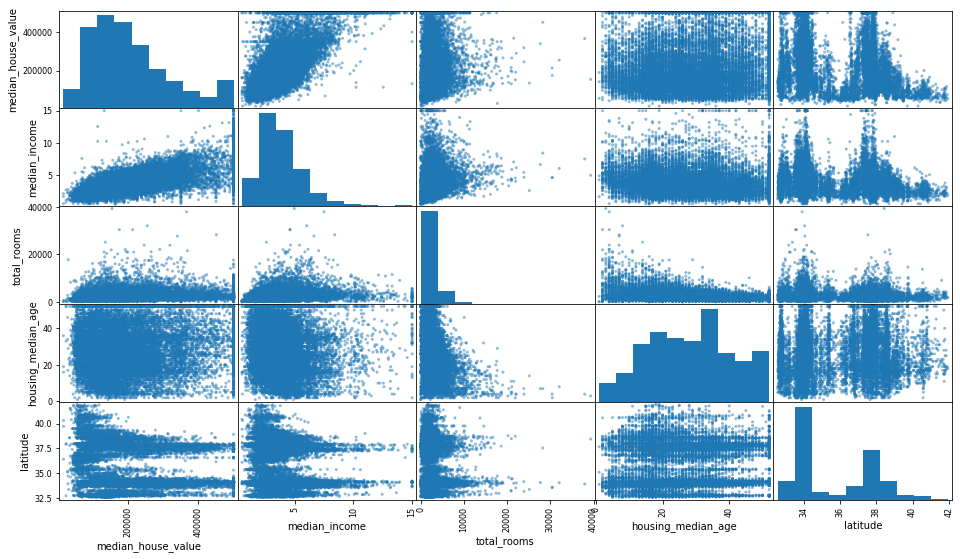

In [20]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age", "latitude"]
scatter_matrix(df_housing[attributes], figsize=(16, 9))
plt.show()

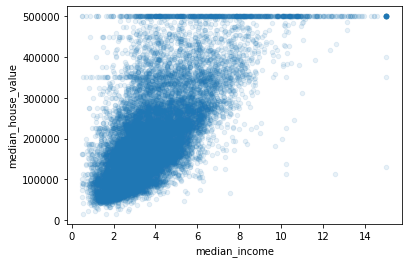

In [21]:
df_housing.plot(
    kind="scatter", 
    x = "median_income", 
    y = "median_house_value", 
    alpha = 0.1
)
plt.show()